In [1]:
import pandas as pd
import numpy as np
import glob
from uimfpy.UIMFReader import *
import matplotlib.pyplot as plt
import pickle
from CollectHeavyTargetPeaks import read_target_list,collect_target_mzbins#,collect_peaks
from CollectHeavyTargetPeaksTest import test_collect_peaks

from scipy import ndimage as ndi
from CollectHeavyTargetPeaks import find_mzbin_infos, xic_matrix, lc_chromatogram, drift_chromatogram
from skimage.feature import peak_local_max

# data loading

In [2]:
data_folder = '/Users/leej324/Downloads/LC_SLIM/'
target_list_file = data_folder+'20190319-Slim charge1-5 light-heavy.xlsx'
concen = 5000
uimf = data_folder+'LC_{0}_heavy_repA_1_MinInt5_DComp5.uimf'.format(concen)
xic2d_file = data_folder+'LC_{0}_heavy_repA_1_MinInt5_DComp5_50ppm.pkl'.format(concen)

def load_data(uimf_file, xic2d_file, target_list_file, ppm=20, isotope=0):
    stime = time.time()
    reader = UIMFReader(uimf_file, TIC_threshold=0)
    target_df = read_target_list(target_list_file, sheet_name=0)
    print('# ready targets:{0},'.format(target_df.shape[0]), (time.time()-stime)/60, 'min')
    target_mzbins, mzbins_by_mz = collect_target_mzbins(target_df, reader.mz_calibrator_by_params, ppm=ppm, isotope=isotope, heavy_only=True)
    print('# ready target m/z bins,', len(target_mzbins[('0.347577', '0.0549547', '1.0')]), (time.time()-stime)/60, 'min')

    try:
        with open(xic2d_file, 'rb') as handle:
            xic_by_mzbins = pickle.load(handle)
    except FileNotFoundError:
        print("[ERR] There is no target_xic2d_file: %s" % xic2d_file)
    print('# ready 2d xic_by_mzbins,', len(xic_by_mzbins), (time.time()-stime)/60, 'min')
    xic_by_mzbins = {k: xic_by_mzbins[k] for k in xic_by_mzbins.keys() & set(target_mzbins[('0.347577', '0.0549547', '1.0')])}
    print('# filtered 2d xic_by_mzbins,', len(xic_by_mzbins), (time.time()-stime)/60, 'min')
    return xic_by_mzbins, mzbins_by_mz

xic_by_mzbins, mzbins_by_mz = load_data(uimf, xic2d_file, target_list_file, ppm=50, isotope=0)

####################################################################################################
# Average TOF length: 812720.0 (0.0)
# M/Z calibrators by params: {('0.347577', '0.0549547', '1.0'): <uimfpy.MzCalibrator.MzCalibrator object at 0x1c22c6ff98>}
####################################################################################################
# ready targets:4490, 0.07961628437042237 min
('0.347577', '0.0549547', '1.0')
('0.347577', '0.0549547', '1.0') , #mzbins: 12265
# ready target m/z bins, 12265 0.08580077091852824 min
# ready 2d xic_by_mzbins, 34373 0.9715286493301392 min
# filtered 2d xic_by_mzbins, 9236 0.9795597155888875 min


In [3]:
reader = UIMFReader(uimf, TIC_threshold=0)
reader.drift_ms(1000)

####################################################################################################
# Average TOF length: 812720.0 (0.0)
# M/Z calibrators by params: {('0.347577', '0.0549547', '1.0'): <uimfpy.MzCalibrator.MzCalibrator object at 0x1c28975518>}
####################################################################################################


812.7199999999999

In [4]:
mydict = reader.get_mzbin_ranges_by_mz_window(800, 801, Da=0.5)
next(iter(mydict.values()))

[81406, 81507]

In [5]:
reader.get_mz(np.array(list(range(81406, 81507))))

{('0.347577',
  '0.0549547',
  '1.0'): array([799.51816656, 799.53782268, 799.55747905, 799.57713566,
        799.5967925 , 799.61644959, 799.63610692, 799.6557645 ,
        799.67542231, 799.69508037, 799.71473866, 799.7343972 ,
        799.75405599, 799.77371501, 799.79337427, 799.81303378,
        799.83269353, 799.85235351, 799.87201374, 799.89167422,
        799.91133493, 799.93099589, 799.95065708, 799.97031852,
        799.9899802 , 800.00964212, 800.02930429, 800.04896669,
        800.06862934, 800.08829223, 800.10795536, 800.12761873,
        800.14728234, 800.1669462 , 800.1866103 , 800.20627463,
        800.22593921, 800.24560403, 800.2652691 , 800.2849344 ,
        800.30459995, 800.32426574, 800.34393177, 800.36359804,
        800.38326455, 800.4029313 , 800.4225983 , 800.44226554,
        800.46193302, 800.48160074, 800.5012687 , 800.5209369 ,
        800.54060535, 800.56027404, 800.57994297, 800.59961214,
        800.61928155, 800.6389512 , 800.6586211 , 800.67829124,
  

find mzbins by sequence ('YLC[+57]EGTESPY[+80]QTGQLHPAIR[+10]', 1205.542267, 1205.542267, 0, 2)


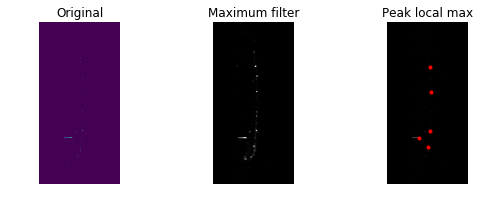

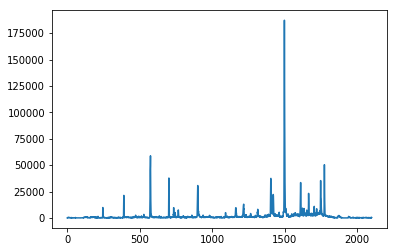

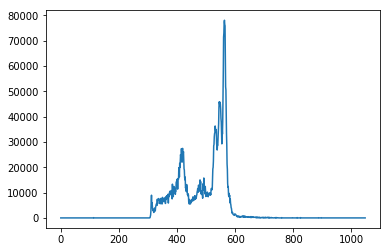

####################
Global peak: frame 1504, scan 416
[ 52 154]
0.00430811649146993
[ 47 104]
0.17180768567982077
[47 21]
0.011028778218163018
roi size: (13, 98)
_peak_area: 715939
_local_peak: {'frame': 1501, 'scan': 420, 'frame_start': 1493, 'frame_end': 1506, 'scan_start': 333, 'scan_end': 431, 'peak_area': 715939}


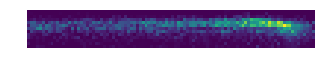

/Volumes/UserData/Joonyong/LC-SLIM/CollectHeavyTargetPeaks.py:214: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return xic_2d[[x.astype(int),y.astype(int)]]


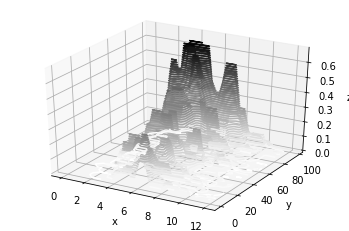

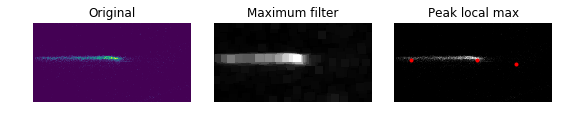

####################
Global peak: frame 579, scan 551
[46 98]
0.3991039117697743
[ 83 122]
0.013268998793727383
[42 50]
0.0
roi size: (13, 16)
_peak_area: 211215
_local_peak: {'frame': 575, 'scan': 549, 'frame_start': 568, 'frame_end': 581, 'scan_start': 541, 'scan_end': 557, 'peak_area': 211215}


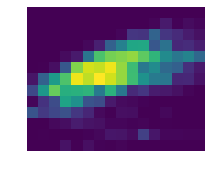

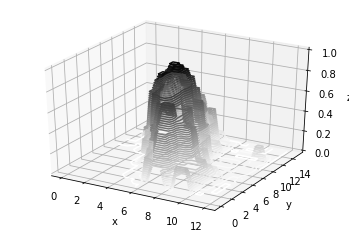

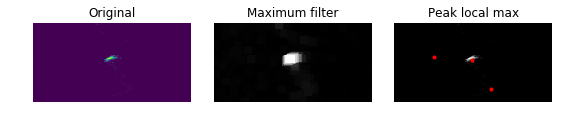

####################
Global peak: frame 1411, scan 561
[ 45 102]
0.5617783904876787
[61 16]
0.13458555919352058
[34 46]
0.013268998793727383
roi size: (13, 14)
_peak_area: 183266
_local_peak: {'frame': 1406, 'scan': 563, 'frame_start': 1400, 'frame_end': 1413, 'scan_start': 556, 'scan_end': 570, 'peak_area': 183266}


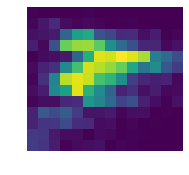

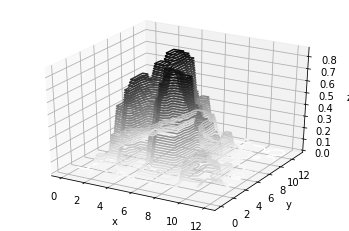

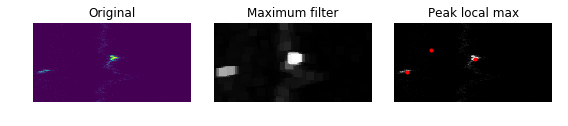

####################
Global peak: frame 905, scan 566
[47 99]
0.694123729105635
[ 82 118]
0.05118042391866276
[55 62]
0.0
roi size: (13, 14)
_peak_area: 158021
_local_peak: {'frame': 902, 'scan': 565, 'frame_start': 895, 'frame_end': 908, 'scan_start': 559, 'scan_end': 573, 'peak_area': 158021}


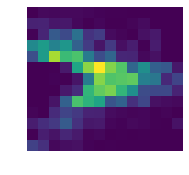

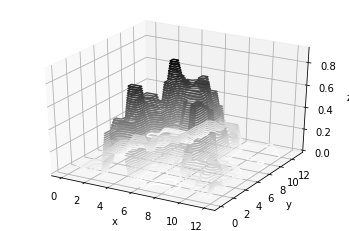

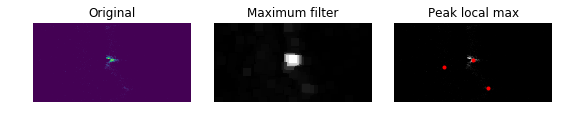

####################
Global peak: frame 1616, scan 531
[45 99]
0.4633810098225056
[76 25]
0.020506634499396863
[26 28]
0.005342064449422712
roi size: (12, 15)
_peak_area: 115026
_local_peak: {'frame': 1611, 'scan': 530, 'frame_start': 1605, 'frame_end': 1617, 'scan_start': 523, 'scan_end': 538, 'peak_area': 115026}


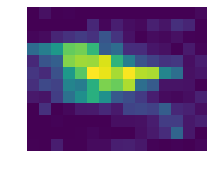

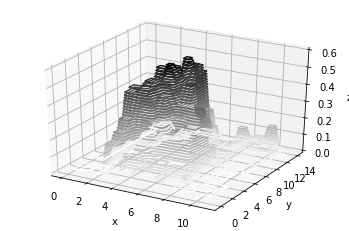

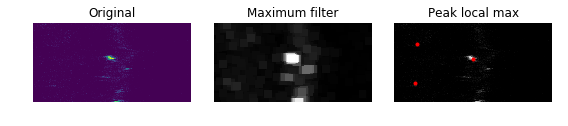

In [6]:
# def get_local_peaks(xic_2d, coordinates, frame_pad=50, scan_pad=100, npeaks_per_candidate=3, local_min_distance=20,
#                     masking_threshold=0.1, frames_for_peak=None, scans_for_peak=None,
#                     th_peak_area=0, fout=None, debug=False):
#     xic_2d_max = xic_2d.max()
#     im_gray = xic_2d/xic_2d_max
#     max_frames,max_scans = xic_2d.shape

#     local_peaks = []
    
#     def get_3d_xic(xic_2d, x, y):
#         return xic_2d[[x.astype(int),y.astype(int)]]

#     for i,j in coordinates:
#         if debug:
#             print("#"*20)
#             print('Global peak: frame {}, scan {}'.format(i, j))
#         # extract a local 2d xic
#         _min_frame = max(0,i-frame_pad)
#         _max_frame = min(i+frame_pad,max_frames)
#         _min_scan = max(0,j-scan_pad)
#         _max_scan = min(j+scan_pad,max_scans)
        
#         #print('Frames: %d:%d, Scans:%d:%d' %(_min_frame,_max_frame,_min_scan,_max_scan))
#         image = im_gray[_min_frame:_max_frame,_min_scan:_max_scan]
        
#         # filter by moving average
#         moving_avg_image = ndi.uniform_filter(image, size=10, mode='constant')
#         local_max = moving_avg_image.max()
        
#         # filter by maximum (only for visualization)
#         image_max = ndi.maximum_filter(image, size=10, mode='constant')
#         # find peak candidates in moving_avg_image
#         candidates = peak_local_max(moving_avg_image, min_distance=local_min_distance, num_peaks=npeaks_per_candidate)
#         if debug:
#             for k in range(candidates.shape[0]):
#                 print(candidates[k])
#                 print(image[candidates[k, 0], candidates[k, 1]])
        
#         if (frames_for_peak is None) or (scans_for_peak is None):
#             ##########################################################
#             # find a rectangle bounding box for each peak candidate
#             ##########################################################
#             # make a binary masking with a threshold
#             mask = moving_avg_image > (local_max*masking_threshold)
#             # label the regions
#             label_im, nb_labels = ndi.label(mask)
#             sizes = ndi.sum(mask, label_im, range(nb_labels + 1))
#             peak_area = ndi.sum(image, label_im, range(nb_labels + 1))

#             target_labels = []
#             for k in range(candidates.shape[0]):
#                 # label of a candidate
#                 target_label = label_im[candidates[k,0], candidates[k,1]]
#                 # if a peak area is too small
#                 # _peak_area = peak_area[target_label]*xic_2d_max
#                 # if _peak_area < th_peak_area: continue
#                 # if a region is meaningful
#                 if (sizes[target_label] > 0) & (target_label not in target_labels):
#                     target_labels.append(target_label)
#                     slice_x, slice_y = ndi.find_objects(label_im==target_label)[0]
#                     #print('boundary:', slice_x, slice_y)
#                     # print(candidates[k], target_label, sizes[target_label], _peak_area)

#                     # save peaks
#                     _local_peak = {'frame':candidates[k,0]+_min_frame, 'scan':candidates[k,1]+_min_scan,
#                      'frame_start':slice_x.start+_min_frame, 'frame_end':slice_x.stop+_min_frame,
#                      'scan_start':slice_y.start+_min_scan, 'scan_end':slice_y.stop+_min_scan,
#                      # 'peak_area':_peak_area
#                     }
#                     _peak_area = np.sum(xic_2d[_local_peak['frame_start']:_local_peak['frame_end'],_local_peak['scan_start']:_local_peak['scan_end']])
#                     if _peak_area < th_peak_area: continue
#                     _local_peak['peak_area'] = _peak_area
                    
#                     local_peaks.append(_local_peak)
#                     if debug:
#                         ##########################################################
#                         # plot
#                         ##########################################################
#                         roi = image[slice_x, slice_y]
                        
#                         print("roi size:", roi.shape)
#                         print('_peak_area:', _peak_area)
#                         print("_local_peak:", _local_peak)

#                         plt.figure(figsize=(4, 2))
#                         plt.axes([0, 0, 1, 1])
#                         plt.imshow(roi)
#                         plt.axis('off')

#                         plt.show()
                        
#                         x = np.linspace(0, slice_x.stop-slice_x.start-1, 30)
#                         y = np.linspace(0, slice_y.stop-slice_y.start-1, 30)

#                         X, Y = np.meshgrid(x, y)
#                         Z = get_3d_xic(roi, X, Y)
#                         fig = plt.figure()
#                         ax = plt.axes(projection='3d')
#                         ax.contour3D(X, Y, Z, 50, cmap='binary')
#                         ax.set_xlabel('x')
#                         ax.set_ylabel('y')
#                         ax.set_zlabel('z')
#                         plt.show()
#             ##########################################################
#             # find a rectangle bounding box for each peak candidate
#             ##########################################################
#         else:
#             _local = peaks_with_static_box(image, xic_2d_max, candidates, _min_frame, _min_scan,
#                 frames_for_peak, scans_for_peak,
#                 th_peak_area)
#             local_peaks += _local
#         if debug:
#             # display results
#             fig, axes = plt.subplots(1, 3, figsize=(8, 3), sharex=True, sharey=True)
#             ax = axes.ravel()
#             ax[0].imshow(image)
#             ax[0].axis('off')
#             ax[0].set_title('Original')

#             ax[1].imshow(image_max, cmap=plt.cm.gray)
#             ax[1].axis('off')
#             ax[1].set_title('Maximum filter')

#             ax[2].imshow(image, cmap=plt.cm.gray)
#             ax[2].autoscale(False)
#             ax[2].plot(candidates[:, 1], candidates[:, 0], 'r.')
#             ax[2].axis('off')
#             ax[2].set_title('Peak local max')

#             plt.tight_layout()
#             # plt.savefig('peak_local_max_{0:.2f}.png'.format(mz))
#             plt.show()
#     return local_peaks

# def collect_peaks(xic_by_mzbin, mzbins, num_frames, num_scans, 
#                   global_min_distance=20, local_min_distance=20, num_top_peaks=20, 
#                   num_global_peaks=20, frames_for_peak=None, scans_for_peak=None,
#                   masking_threshold=0.01, th_peak_area=0, moving_avg_size=20, debug=False):
#     im = xic_matrix(xic_by_mzbin, mzbins, num_frames, num_scans, normalize=False)
#     if im.max()==0:
#         print('im.max()==0:', mzbins)
#         return []
#     im_gray = im/im.max()

#     moving_avg_image = ndi.uniform_filter(im_gray, size=moving_avg_size, mode='constant')

#     # Comparison between image_max and im to find the coordinates of local maxima
#     coordinates = peak_local_max(moving_avg_image, min_distance=global_min_distance, num_peaks=num_global_peaks)
    
#     if debug:
#         # display results
#         fig, axes = plt.subplots(1, 3, figsize=(8, 3), sharex=True, sharey=True)
#         ax = axes.ravel()
#         ax[0].imshow(im_gray)

#         ax[0].axis('off')
#         ax[0].set_title('Original')

#         ax[1].imshow(moving_avg_image, cmap=plt.cm.gray)
#         ax[1].axis('off')
#         ax[1].set_title('Maximum filter')

#         ax[2].imshow(im_gray, cmap=plt.cm.gray)
#         ax[2].autoscale(False)
#         ax[2].plot(coordinates[:, 1], coordinates[:, 0], 'r.')
#         ax[2].axis('off')
#         ax[2].set_title('Peak local max')

#         plt.tight_layout()

#         plt.show()

#         lc_chromatogram(xic_by_mzbin, mzbins, num_frames, num_scans)
#         drift_chromatogram(xic_by_mzbin, mzbins, num_frames, num_scans)
    
#     local_peaks = get_local_peaks(im, coordinates, frame_pad=50, scan_pad=100, npeaks_per_candidate=3, local_min_distance=local_min_distance, 
#                                   frames_for_peak=frames_for_peak, scans_for_peak=scans_for_peak, masking_threshold=masking_threshold,
#                                   th_peak_area=th_peak_area, debug=debug)
#     if len(local_peaks) == 0: return []

#     local_peaks_df = pd.DataFrame(local_peaks).drop_duplicates()
#     local_peaks_df = local_peaks_df.astype(np.uint32)
#     return local_peaks_df.sort_values('peak_area', ascending=False).head(num_top_peaks).to_dict(orient='record')

# def test_collect_peaks(xic_by_mzbins, mzbins_by_mz, pepseq, z, num_frames, num_scans,
#                        global_min_distance, local_min_distance,
#                        num_top_peaks, num_global_peaks, frames_for_peak, scans_for_peak,
#                        masking_threshold, th_peak_area, moving_avg_size, debug=True):
#     mono_info = find_mzbin_infos(mzbins_by_mz, pepseq, 0, z)
#     if debug: print("find mzbins by sequence", mono_info)
#     target_mzbin = mzbins_by_mz[mono_info]
#     local_peaks = collect_peaks(xic_by_mzbins, target_mzbin, num_frames, num_scans,
#                                 global_min_distance=global_min_distance, local_min_distance=local_min_distance,
#                                 num_top_peaks=num_top_peaks, num_global_peaks=num_global_peaks,
#                                 frames_for_peak=frames_for_peak, scans_for_peak=scans_for_peak,
#                                 masking_threshold=masking_threshold, th_peak_area=th_peak_area,
#                                 moving_avg_size=moving_avg_size, debug=debug)
#     return local_peaks

# # pepseq = 'IQAAAST[+80]PTNATAASDANTGDR[+10]'
pepseq = 'YLC[+57]EGTESPY[+80]QTGQLHPAIR[+10]'
z = 2
# reader = UIMFReader(uimf, TIC_threshold=0)

peak_candidates = test_collect_peaks(reader, xic_by_mzbins, mzbins_by_mz, pepseq, z, reader.num_frames, reader.num_scans,
                   global_min_distance=20, local_min_distance=15,
                   num_top_peaks=20, num_global_peaks=5, frames_for_peak=None, scans_for_peak=None,
                   masking_threshold=0.3, th_peak_area=1000, moving_avg_size=20, debug=True)

In [8]:
peak_candidates

[{'frame': 575,
  'frame_end': 581,
  'frame_start': 568,
  'peak_area': 211215,
  'scan': 549,
  'scan_end': 557,
  'scan_start': 541,
  'ppm_error': 42.75775610380777},
 {'frame': 1406,
  'frame_end': 1413,
  'frame_start': 1400,
  'peak_area': 183266,
  'scan': 563,
  'scan_end': 570,
  'scan_start': 556,
  'ppm_error': 17.305420386743723},
 {'frame': 902,
  'frame_end': 908,
  'frame_start': 895,
  'peak_area': 158021,
  'scan': 565,
  'scan_end': 573,
  'scan_start': 559,
  'ppm_error': 42.75775610380777},
 {'frame': 1611,
  'frame_end': 1617,
  'frame_start': 1605,
  'peak_area': 115026,
  'scan': 530,
  'scan_end': 538,
  'scan_start': 523,
  'ppm_error': 62.778414086275795}]

charge_state: 2.0
[1205.49072072 1205.99762727 1206.48049448 1206.98760906 1207.4948302 ]
[  42.7577561   377.72235946  778.26178619 1198.91446677 1619.65553432]
42.75775610380777


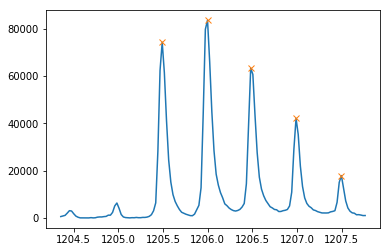

In [7]:
import time
from scipy.signal import find_peaks

mz = 1205.542267
peak = peak_candidates[0]
frame_nums=range(peak['frame_start'],peak['frame_end'])
scan_nums=range(peak['scan_start'],peak['scan_end'])
scan_nums=range(peak['scan']-10,peak['scan']+10)

charge_state, mz_arr, mz_int, valid_peak_idxs = reader.get_charge_state(mz, frame_nums, scan_nums)
print("charge_state:", charge_state)
print(mz_arr[valid_peak_idxs])
ppm_errors = 1e6*np.abs(mz_arr[valid_peak_idxs]-mz)/mz
min_ppm_errors = ppm_errors.min()

print(ppm_errors)
print(min_ppm_errors)
plt.plot(mz_arr, mz_int)
plt.plot(mz_arr[valid_peak_idxs], mz_int[valid_peak_idxs], "x")
plt.show()